In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
df = pd.read_csv('Crop_recommendation.csv')
df.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [3]:
df[['N','P','K','temperature','humidity','ph','rainfall']].corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


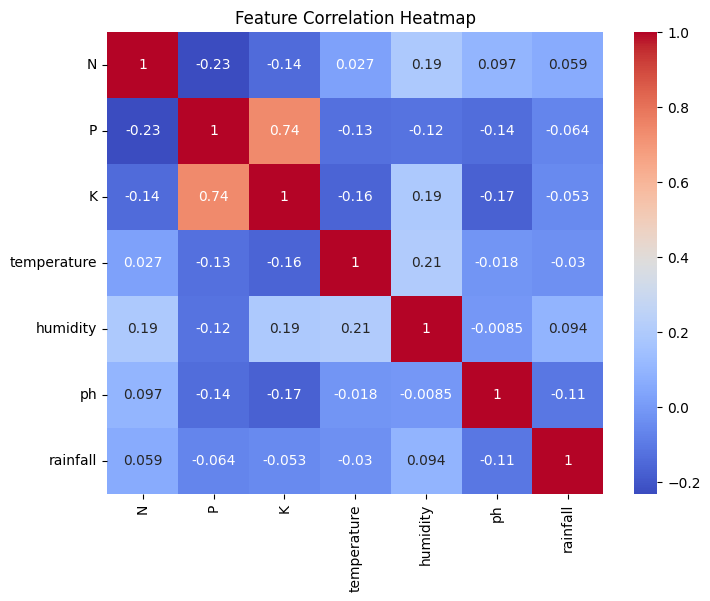

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


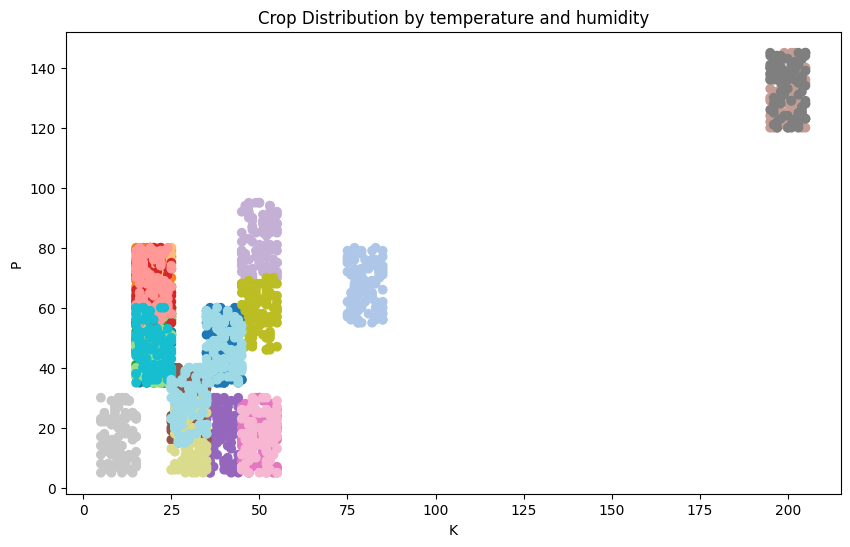

In [9]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(df["K"], df["P"], c=pd.factorize(df["label"])[0], cmap="tab20")
plt.xlabel("K")
plt.ylabel("P")
plt.title("Crop Distribution by temperature and humidity")
plt.show()

In [75]:
X = df[["N","P","K","temperature","humidity","ph","rainfall"]]
y = df[['label']]
np.unique(y)

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.cluster import KMeans
wcss=[]
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)
wcss

[8594.625326922387,
 7025.337210971341,
 5775.124464531857,
 5019.414853929986,
 4267.751141372453,
 3977.3202660337965,
 3546.9380948893718,
 3207.2549096481644,
 3044.628104281202]

In [14]:
from kneed import KneeLocator
kl = KneeLocator(range(2,11),wcss,curve='convex',direction='decreasing')
kl.elbow

np.int64(6)

In [16]:
kmeans = KMeans(n_clusters = 6, init='k-means++')
y_pred = kmeans.fit_predict(X_train_scaled)

Text(0, 0.5, 'humidity')

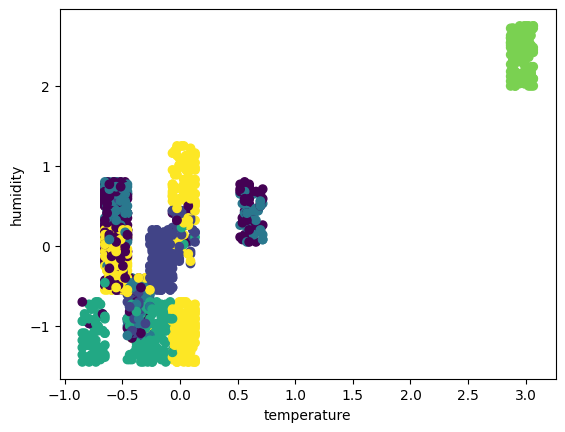

In [17]:
plt.scatter(X_train_scaled[:,2],X_train_scaled[:,1],c=y_pred)
plt.xlabel('temperature')
plt.ylabel('humidity')

In [18]:
df_train_clusters = X_train.copy()
df_train_clusters['Cluster'] = y_pred 
cluster_summary = df_train_clusters.groupby('Cluster').mean()
print(cluster_summary)


                 N           P           K  temperature   humidity        ph  \
Cluster                                                                        
0        28.943953   57.914454   27.790560    27.048038  61.981399  7.191781   
1        77.808511   43.872340   38.548936    26.011917  77.409847  6.604806   
2        23.418502   57.524229   29.303965    24.991280  37.824677  5.642457   
3        19.175000   17.485000   26.520000    23.940113  92.425351  6.489150   
4        20.825175  133.538462  200.006993    23.120455  86.551728  5.968141   
5        98.250000   42.065657   38.906566    25.975970  80.671385  6.437439   

           rainfall  
Cluster              
0         62.241721  
1        196.971291  
2        103.352880  
3        128.736882  
4         89.403297  
5         70.800650  


In [19]:
df_train_clusters['True_Label'] = y_train.values.ravel()  
cluster_vs_label = pd.crosstab(df_train_clusters['Cluster'], df_train_clusters['True_Label'])
print(cluster_vs_label)

True_Label  apple  banana  blackgram  chickpea  coconut  coffee  cotton  \
Cluster                                                                   
0               0       0         74        39        0       0       0   
1               0       0          0         0        5      56       0   
2               0       0          0        27        0       0       0   
3               0       0          0         0       62       0       0   
4              66       0          0         0        0       0       0   
5               0      74          0         0        0      14      72   

True_Label  grapes  jute  kidneybeans  ...  mango  mothbeans  mungbean  \
Cluster                                ...                               
0                0     0            0  ...     22         41        69   
1                0    66            0  ...      0          0         0   
2                0     0           64  ...     46         25         0   
3                0     0     

In [20]:
cluster_purity = cluster_vs_label.div(cluster_vs_label.sum(axis=1), axis=0)
print(cluster_purity)

True_Label     apple    banana  blackgram  chickpea   coconut    coffee  \
Cluster                                                                   
0           0.000000  0.000000   0.218289  0.115044  0.000000  0.000000   
1           0.000000  0.000000   0.000000  0.000000  0.021277  0.238298   
2           0.000000  0.000000   0.000000  0.118943  0.000000  0.000000   
3           0.000000  0.000000   0.000000  0.000000  0.310000  0.000000   
4           0.461538  0.000000   0.000000  0.000000  0.000000  0.000000   
5           0.000000  0.186869   0.000000  0.000000  0.000000  0.035354   

True_Label    cotton    grapes      jute  kidneybeans  ...     mango  \
Cluster                                                ...             
0           0.000000  0.000000  0.000000     0.000000  ...  0.064897   
1           0.000000  0.000000  0.280851     0.000000  ...  0.000000   
2           0.000000  0.000000  0.000000     0.281938  ...  0.202643   
3           0.000000  0.000000  0.00000

In [21]:
dominant_crop = cluster_purity.idxmax(axis=1)
print(dominant_crop)

Cluster
0      blackgram
1           rice
2    kidneybeans
3         orange
4         grapes
5     watermelon
dtype: object


### What this tells you:

### - KMeans partially discovered natural groupings of crops based on soil/nutrient/weather features.

### - But clusters are not perfect → many crops mix in the same cluster (unsupervised limitation).

### - Still, this validates that features contain meaningful patterns → good news for supervised learning.

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf =  RandomForestClassifier(random_state=42)
y_train=  y_train.squeeze()
param_grid = {
    "n_estimators": [100, 200, 500],
    "max_depth": [None, 10, 20, 30],
}
grid_cv = GridSearchCV(rf,param_grid,cv=5,scoring="accuracy")
grid_cv.fit(X_train,y_train)
print("Best n_estimators:", grid_cv.best_params_)

Best n_estimators: {'max_depth': None, 'n_estimators': 100}


In [32]:
rnd_clf = RandomForestClassifier(n_estimators = 100, max_depth=None)
rnd_clf.fit(X_train,y_train)
y_pred_clf = rnd_clf.predict(X_test)


In [81]:
for i in range(len(y_test)):
    print(f"actual y: {y_test.iloc[i]} and predicted y: {y_pred_clf[i]}")


actual y: label    muskmelon
Name: 1451, dtype: object and predicted y: muskmelon
actual y: label    watermelon
Name: 1334, dtype: object and predicted y: watermelon
actual y: label    papaya
Name: 1761, dtype: object and predicted y: papaya
actual y: label    papaya
Name: 1735, dtype: object and predicted y: papaya
actual y: label    apple
Name: 1576, dtype: object and predicted y: apple
actual y: label    mango
Name: 1110, dtype: object and predicted y: mango
actual y: label    apple
Name: 1594, dtype: object and predicted y: apple
actual y: label    mothbeans
Name: 530, dtype: object and predicted y: mothbeans
actual y: label    mungbean
Name: 651, dtype: object and predicted y: mungbean
actual y: label    lentil
Name: 819, dtype: object and predicted y: lentil
actual y: label    blackgram
Name: 771, dtype: object and predicted y: blackgram
actual y: label    coconut
Name: 1878, dtype: object and predicted y: coconut
actual y: label    pomegranate
Name: 915, dtype: object and predic

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_clf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_clf))

Confusion Matrix:
 [[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 36  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 34  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  

In [39]:
print("Train Accuracy:", rnd_clf.score(X_train, y_train))
print("Test Accuracy:", rnd_clf.score(X_test, y_test))


Train Accuracy: 1.0
Test Accuracy: 0.9924242424242424


In [42]:
from sklearn.model_selection import cross_val_score
y=y.values.ravel()
scores = cross_val_score(rnd_clf, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV Accuracy:", scores.mean())


Cross-validation scores: [0.99545455 0.99318182 0.99545455 0.99545455 0.98636364]
Mean CV Accuracy: 0.9931818181818184


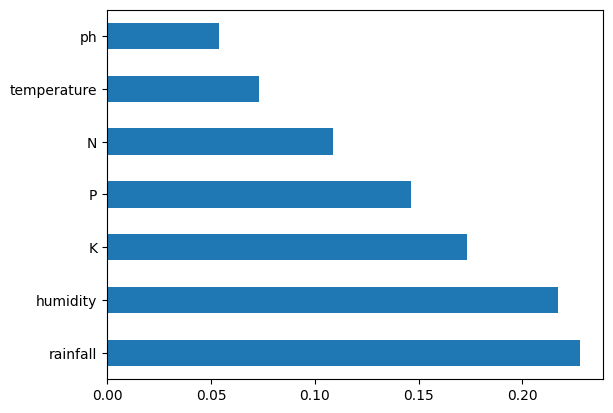

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

feat_importances = pd.Series(rnd_clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


In [44]:
import joblib
joblib.dump(rnd_clf,'crop_recommendation_rf_model.pkl')

['crop_recommendation_rf_model.pkl']

In [80]:
!pip install shap

In [59]:
import shap 
# load JS visualization code to notebook
shap.initjs()
explainer = shap.TreeExplainer(rnd_clf)
shap_values = explainer.shap_values(X_test)

IndexError: index 8 is out of bounds for axis 1 with size 7

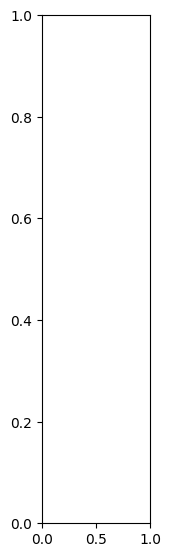

In [79]:
# print("Variable Importance Plot - Global Interpretation")
# figure = plt.figure()
# shap.summary_plot(shap_values, X_test)
shap.summary_plot(shap_values, X_test)  # for class 0
